### 딥러닝을 이용한 diabetes 데이터 회귀 분석


In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\DoHyeonjik\datasets\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [18]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


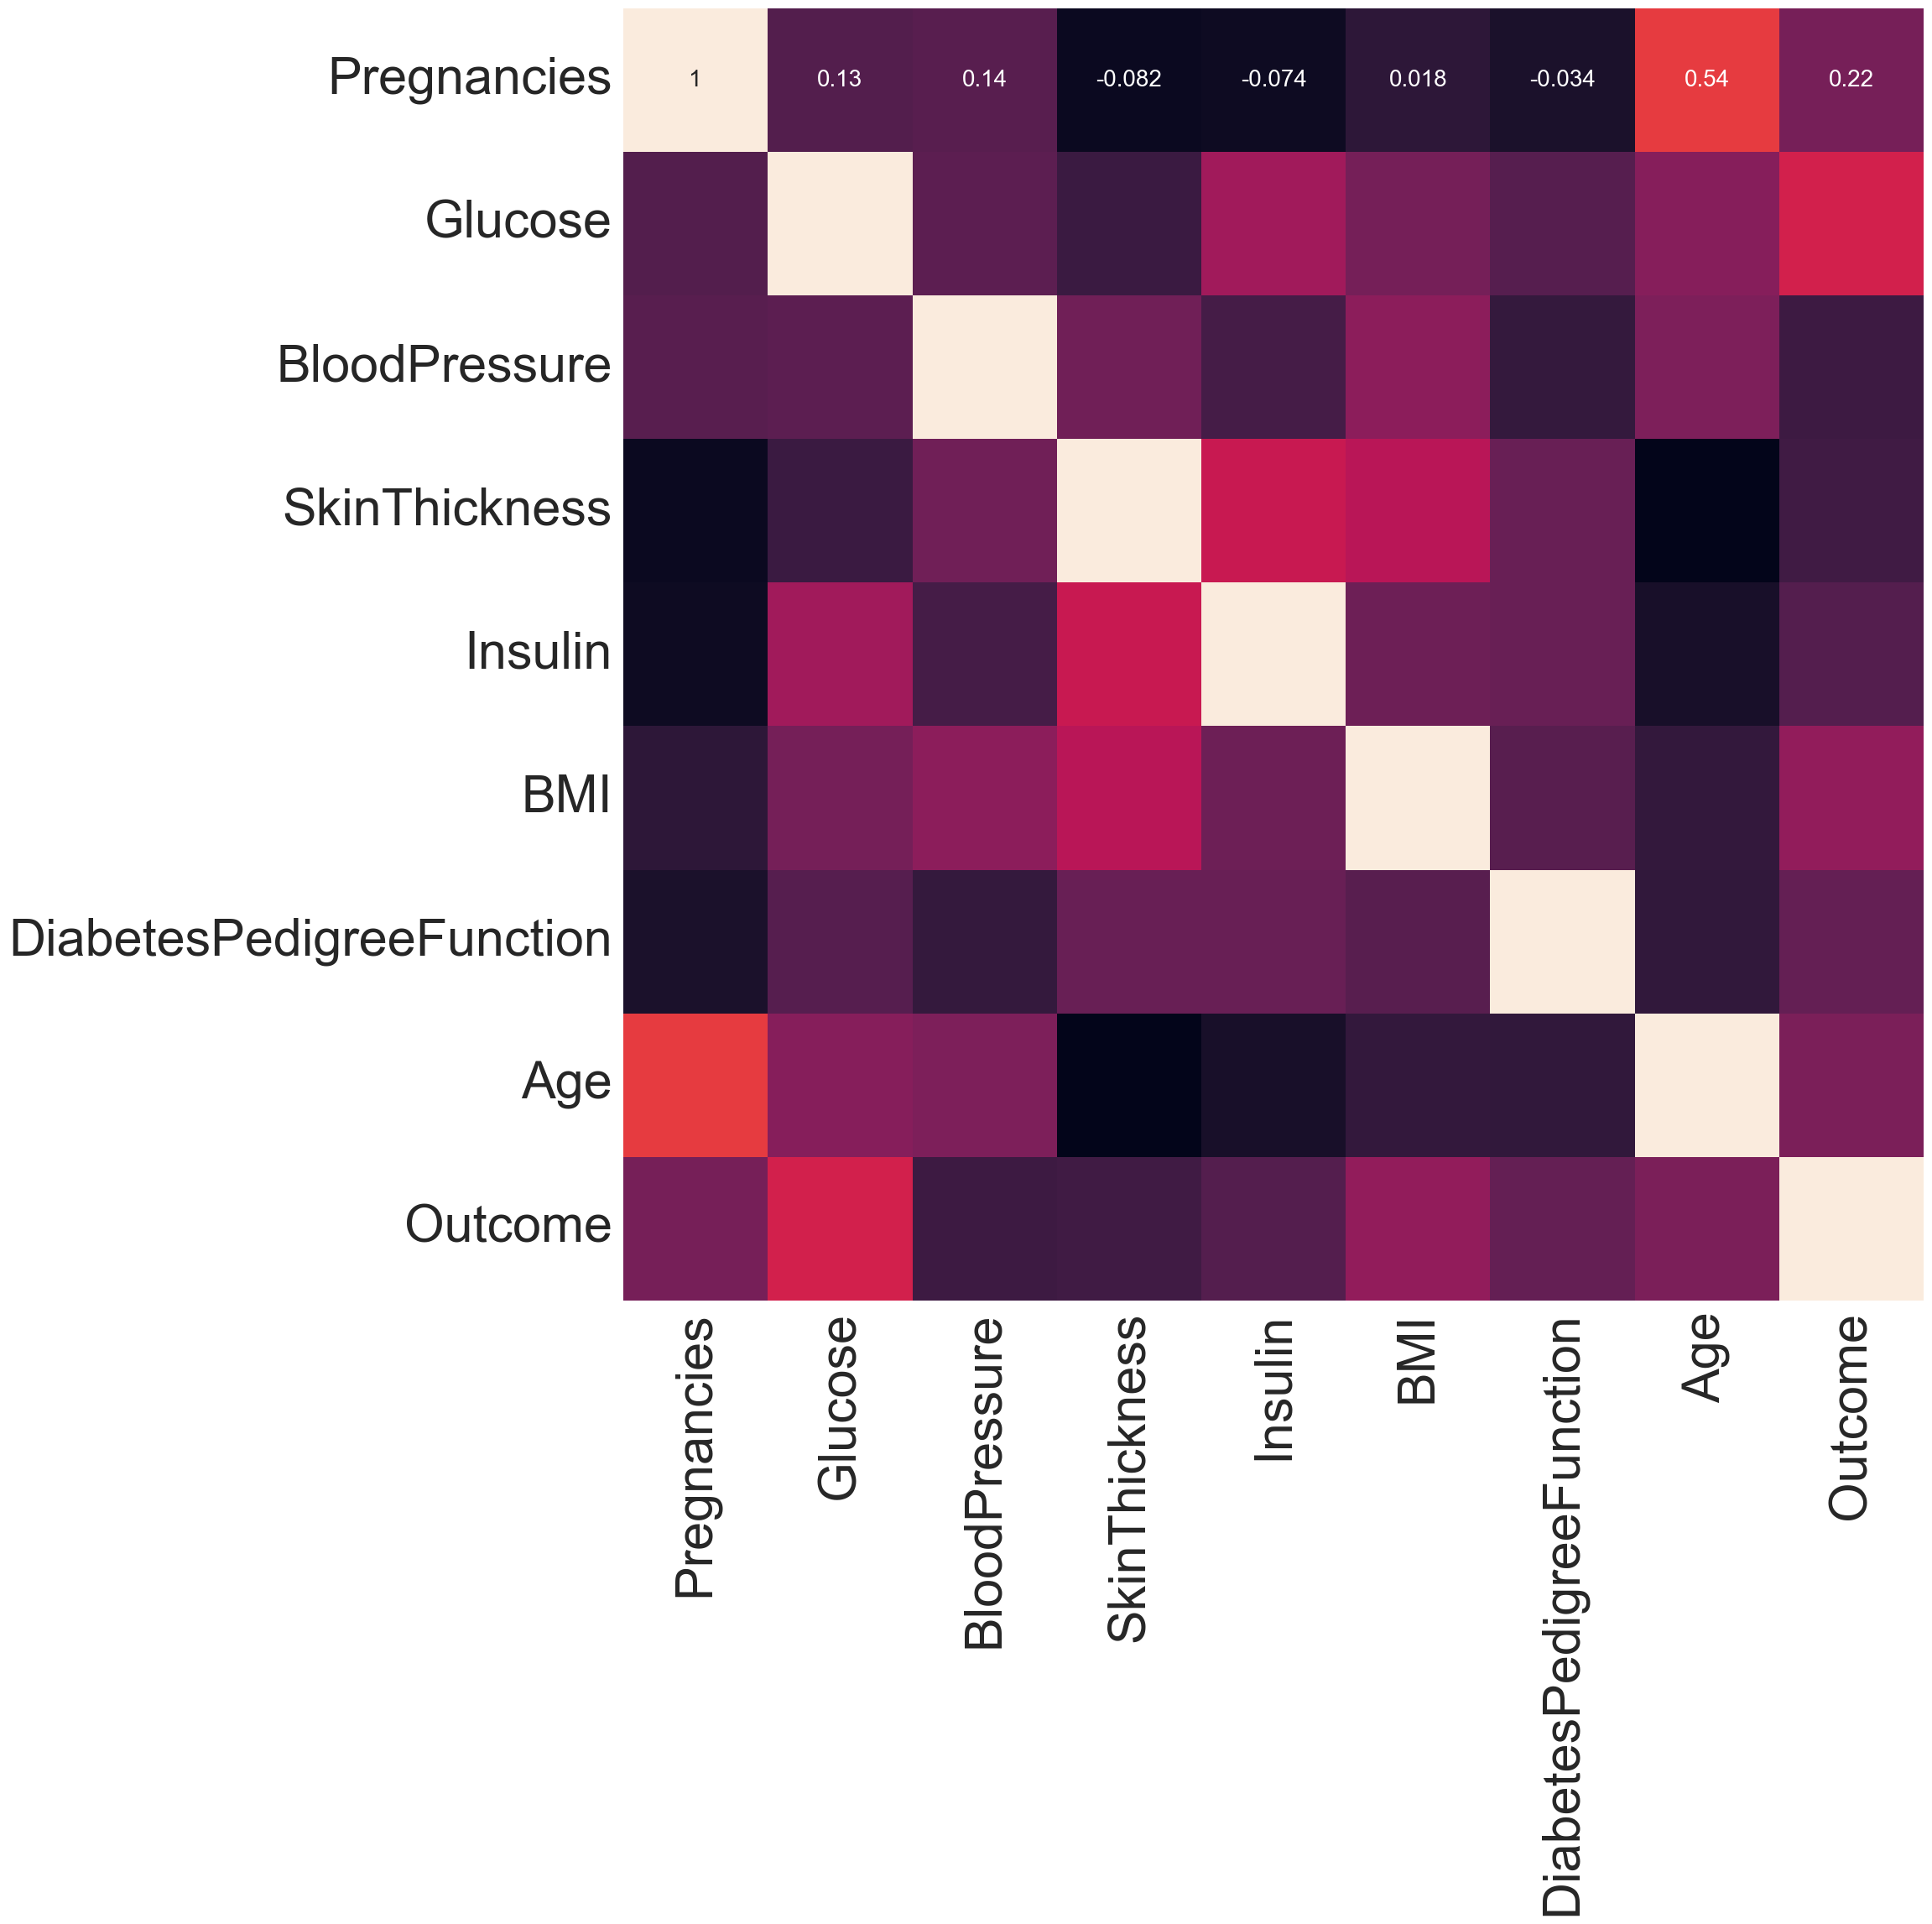

In [19]:
df_corr = df.corr()

plt.figure(figsize=(20,20))
sns.set(font_scale=4)
sns.heatmap(df_corr, annot=True, cbar=False, annot_kws={"size": 20})
plt.show()

In [23]:
#데이터와 레이블 분할
df_train = df.drop('Outcome', axis=1)
df_train.head()

df_label = df['Outcome']
df_label.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [27]:
# 원핫인코딩
df_label = pd.get_dummies(df_label)
print(type(df_train))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
#pandas 데이터프레임 파일을 numpy로 변환
df_train = df_train.values
df_label = df_label.values

In [ ]:
#훈련데이터와 테스트 데이터로 분할
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_train, df_label, test_size=0.2, shuffle=True, random_state=12)

In [39]:
#딥러닝 모델 생성
from tensorflow import keras
from keras.layers import Dense
Model = keras.models.Sequential()

Model.add(Dense(32, input_shape=(8,), activation='relu'))
Model.add(Dense(16, activation='relu'))
Model.add(Dense(8, activation='relu'))
Model.add(Dense(1))

Model.compile(optimizer='rmsprop', loss = 'mse', metrics=['mse'])

Model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
history = Model.fit(x_train, y_train, epochs= 10, batch_size=32, validation_data=(x_test, y_test))
model_pred = Model.predict(x_test)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.9404 - mse: 3.9404 - val_loss: 7.3628 - val_mse: 7.3628
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3384 - mse: 3.3384 - val_loss: 2.9437 - val_mse: 2.9437
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.9969 - mse: 3.9969 - val_loss: 3.0693 - val_mse: 3.0693
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7207 - mse: 2.7207 - val_loss: 1.9197 - val_mse: 1.9197
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5726 - mse: 2.5726 - val_loss: 1.6576 - val_mse: 1.6576
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9848 - mse: 2.9848 - val_loss: 2.5292 - val_mse: 2.5292
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7773 - mse: 2.7773 - val_loss: 1.3238 - val_mse: 1.3238
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2377 - mse: 3.2377 - val_loss: 4.5526 - val_mse: 4.5526
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8054 - mse: 

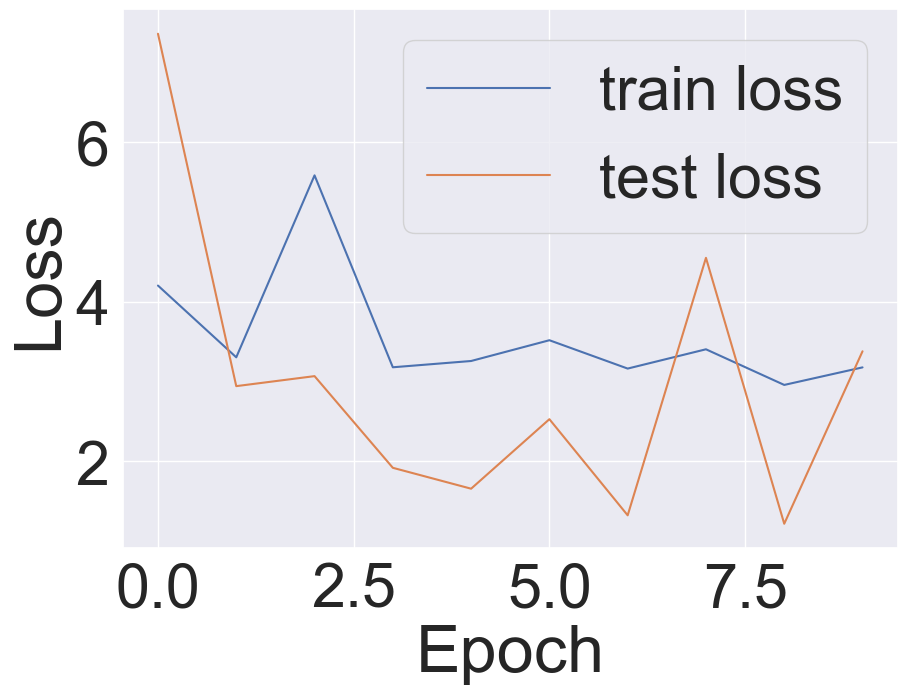

In [44]:
plt.figure(figsize=(10,7))
plt.plot(range(10), history.history['loss'], label='train loss')
plt.plot(range(10), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
Model.evaluate(x_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.1826 - mse: 3.1826 


[3.3805935382843018, 3.3805935382843018]